# 1. Preparing the tools

In [4]:
import sys
import os

# Regular EDA and plotting libraries
import numpy as np
import pandas as pd
import matplotlib
import matplotlib.pyplot as plt
import seaborn as sns
from matplotlib.ticker import FuncFormatter

## Models
import sklearn 
from sklearn.linear_model import LogisticRegression
from sklearn.neighbors import KNeighborsClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.neural_network import MLPClassifier # For ANN
from sklearn.svm import SVC  # For SVM (Support Vector Machine)
from sklearn.naive_bayes import GaussianNB  # For Naive Bayes
from sklearn.naive_bayes import BernoulliNB  # For binary classification


## Model evaluators
from sklearn.model_selection import train_test_split, cross_val_score
from sklearn.model_selection import RandomizedSearchCV, GridSearchCV
from sklearn.metrics import confusion_matrix, classification_report, ConfusionMatrixDisplay
from sklearn.metrics import make_scorer, precision_score, recall_score, accuracy_score, f1_score
from sklearn.model_selection import cross_validate
from sklearn.ensemble import VotingClassifier
from sklearn.metrics import RocCurveDisplay, roc_auc_score

import datetime
print(f"Notebook last updated: {datetime.datetime.now()}\n")
print(f"NumPy version: {np.__version__}")
print(f"pandas version: {pd.__version__}")
print(f"matplotlib version: {matplotlib.__version__}")
print(f"Scikit-Learn version: {sklearn.__version__}")

Notebook last updated: 2025-01-07 18:00:43.547066

NumPy version: 2.2.1
pandas version: 2.2.3
matplotlib version: 3.10.0
Scikit-Learn version: 1.6.0


# 2. Loading Data

In [5]:
# Get project root directory
project_dir = os.path.abspath("..")
sys.path.append(project_dir)

from src import config

# Use absolute path instead of relative
df = pd.read_csv(os.path.join(project_dir, config.HEART_DATA_PATH))

df.shape

(297, 14)

In [ ]:
df.head()

In [ ]:
# Count the number of missing values in each column
df.isnull().sum()

In [ ]:
df.info()

In [ ]:
df.describe()

In [ ]:
#Number of positive(1) and negative(0) samples in our dataframe
df.target.value_counts()

In [ ]:
# Normalized value counts
df.target.value_counts(normalize=True)

In [ ]:
df.target.value_counts().plot(kind="bar", color=["salmon", "lightblue"])
plt.title("Heart Disease Frequency")
plt.xticks(rotation=0)
plt.tight_layout()

### 3.1 Comparing one feature to another

In [ ]:
# Define age bins and labels
age_bins = [0, 20, 40, 60, 80, 100]
age_labels = ['0-20', '20-40', '40-60', '60-80', '80-100']

pd.crosstab(
    df['target'], 
    pd.cut(df['age'], bins=age_bins, labels=age_labels, right=False)
)

sex      0    1
target         
0       71   89
1       25  112


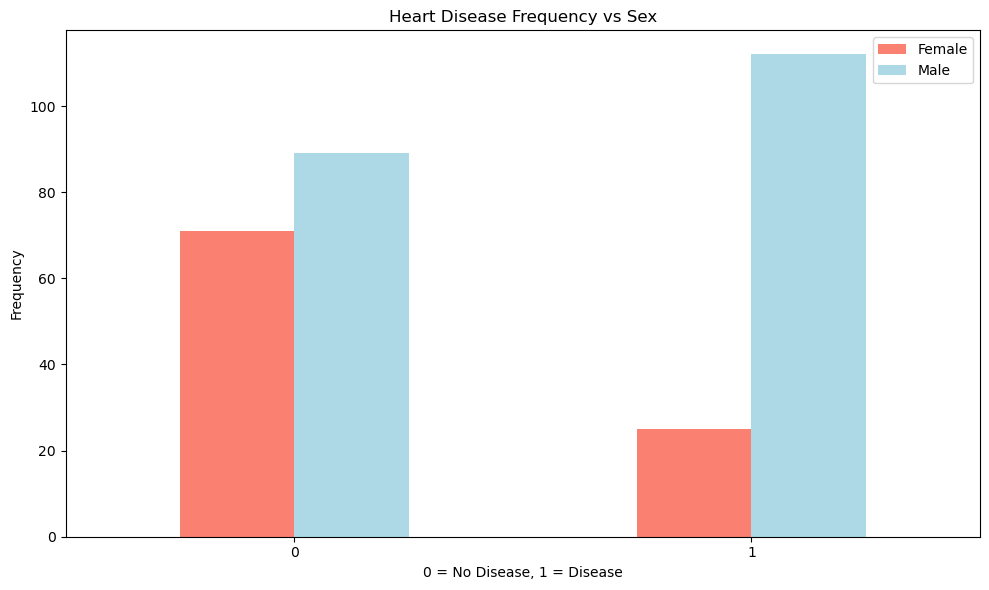

In [6]:
# Compare target column with sex column | For sex, 1=male, 0=female 
print(pd.crosstab(index=df.target, columns=df.sex))

pd.crosstab(df.target, df.sex).plot(kind="bar", figsize=(10,6), color=["salmon", "lightblue"])

plt.title("Heart Disease Frequency vs Sex")
plt.xlabel("0 = No Disease, 1 = Disease")
plt.ylabel("Frequency")
plt.legend(["Female", "Male"])
plt.xticks(rotation=0)

plt.tight_layout()

In [ ]:
# Create crosstab and plot
pd.crosstab(df.cp, df.target).plot(
    kind="bar",
    color=["#1f77b4", "#ff7f0e"],  # CUD Blue and CUD Orange
    alpha=0.8
)

plt.title("Heart Disease Frequency Per Chest Pain Type", fontsize=12)
plt.xlabel("Chest Pain Type", fontsize=10)
plt.ylabel("Frequency", fontsize=10)
plt.legend(["No Disease", "Disease"], fontsize=9)
plt.xticks(fontsize=8, rotation=0)
plt.yticks(fontsize=8)
plt.grid(visible=True, linestyle="--", linewidth=0.5, alpha=0.7)

plt.tight_layout()

plt.show()

In [ ]:

# Scatter plot for "Disease"
plt.scatter(
    df.age[df.target == 1],
    df.thalach[df.target == 1],
    c="#ff7f0e",  # CUD Orange
    alpha=0.8,
    edgecolor="black",
    linewidth=0.5
)

# Scatter plot for "No Disease"
plt.scatter(
    df.age[df.target == 0],
    df.thalach[df.target == 0],
    c="#1f77b4",  # CUD Blue
    alpha=0.8,
    edgecolor="black",
    linewidth=0.5
)

plt.title("Heart Disease by Age and Max Heart Rate", fontsize=12)
plt.xlabel("Age", fontsize=10)
plt.ylabel("Max Heart Rate", fontsize=10)

plt.legend(["Disease", "No Disease"], fontsize=9)
plt.xticks(fontsize=8)
plt.yticks(fontsize=8)
plt.grid(visible=True, linestyle="--", linewidth=0.5, alpha=0.7)

plt.tight_layout()

plt.show()


### 3.2 Histogram to check the distribution of the variables

In [19]:
def save_histograms_for_paper(df, columns, output_dir, bins=15, color='#1f77b4', figsize=(3, 2)):
    """    
    Args:
    - df (pd.DataFrame): DataFrame containing the data.
    - columns (list): List of column names to plot.
    - output_dir (str): Directory to save the images.
    - bins (int): Number of bins for the histograms.
    - color (str): Color of the histograms (color-blind friendly).
    - figsize (tuple): Size of each figure (width, height).
    """
    for col in columns:
        plt.figure(figsize=figsize)
        sns.histplot(
            df[col],
            bins=bins,
            kde=False,
            color=color,
            edgecolor='black'
        )
        
        # Remove axis labels
        plt.xlabel("")  # Remove x-axis label text
        plt.ylabel("")  # Remove y-axis label text
        
        # Add title
        plt.title(col, fontsize=12)
        
        # Enable grid
        plt.grid(visible=True, linestyle='--', linewidth=0.5, alpha=0.7)
        
        # Format layout
        plt.tight_layout()
        
        # Save the figure
        plt.savefig(f"{output_dir}/{col}_histogram.png", dpi=300, bbox_inches='tight')
        plt.close()

columns_to_plot = ['age', 'sex', 'cp', 'trestbps', 'chol', 'fbs', 'restecg', 
                   'thalach', 'exang', 'oldpeak', 'slope', 'ca', 'thal']

output_directory = os.path.join(project_dir, "reports", "figures", "histograms", "heart_disease")
os.makedirs(output_directory, exist_ok=True)

save_histograms_for_paper(df, columns_to_plot, output_directory, bins=15, color='#1f77b4', figsize=(3.5, 2.5))


### 3.3 Correlation between independent variables

In [7]:
#correlation between our independent variables | Prepare the features and target variables.
X = df.drop(columns=['target'])
y = df['target'].values

corr_matrix = X.corr()
corr_matrix 

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal
age,1.000000,-0.092399,0.110471,0.290476,0.202644,0.132062,0.149917,-0.394563,0.096489,0.197123,0.159405,0.362210,0.120795
sex,-0.092399,1.000000,0.008908,-0.066340,-0.198089,0.038850,0.033897,-0.060496,0.143581,0.106567,0.033345,0.091925,0.370556
cp,0.110471,0.008908,1.000000,-0.036980,0.072088,-0.057663,0.063905,-0.339308,0.377525,0.203244,0.151079,0.235644,0.266275
trestbps,0.290476,-0.066340,-0.036980,1.000000,0.131536,0.180860,0.149242,-0.049108,0.066691,0.191243,0.121172,0.097954,0.130612
chol,0.202644,-0.198089,0.072088,0.131536,1.000000,0.012708,0.165046,-0.000075,0.059339,0.038596,-0.009215,0.115945,0.023441
fbs,0.132062,0.038850,-0.057663,0.180860,0.012708,1.000000,0.068831,-0.007842,-0.000893,0.008311,0.047819,0.152086,0.051038
restecg,0.149917,0.033897,0.063905,0.149242,0.165046,0.068831,1.000000,-0.072290,0.081874,0.113726,0.135141,0.129021,0.013612
thalach,-0.394563,-0.060496,-0.339308,-0.049108,-0.000075,-0.007842,-0.072290,1.000000,-0.384368,-0.347640,-0.389307,-0.268727,-0.258386
exang,0.096489,0.143581,0.377525,0.066691,0.059339,-0.000893,0.081874,-0.384368,1.000000,0.289310,0.250572,0.148232,0.323268
oldpeak,0.197123,0.106567,0.203244,0.191243,0.038596,0.008311,0.113726,-0.347640,0.289310,1.000000,0.579037,0.294452,0.336809


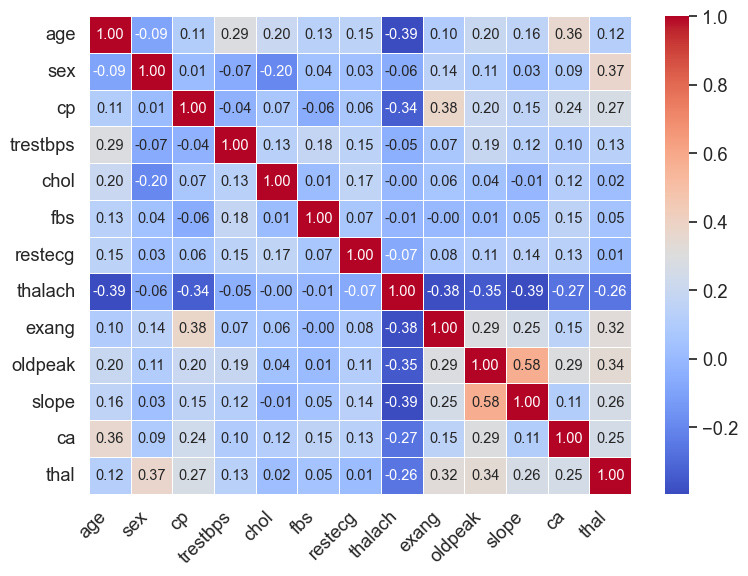

In [8]:
# correlation matrix heatmap
plt.figure(figsize=(8, 6))
sns.set(font_scale=1.2)
sns.heatmap(
    corr_matrix,
    annot=True,
    linewidths=0.5,
    fmt=".2f",
    cmap="coolwarm",  # Use a colorblind-friendly palett
    annot_kws={"size": 10.5},
)


plt.xticks(rotation=45, ha="right")
plt.yticks(rotation=0)
plt.tight_layout()
plt.show()

# 4. Modeling

In [22]:
# Prepare the features and target variables.

X = df.drop(labels="target", axis=1)

# Target variable (in the form of a NumPy array)
y = df.target.to_numpy() 

### 4.1 Creating a training and test split

In [ ]:
# Split into train & test set
# Random seed for reproducible results
np.random.seed(42)
X_train, X_test, y_train, y_test = train_test_split(X, # independent variables 
                                                    y, # dependent variable
                                                    test_size = 0.2, # percentage of data to use for test set
                                                    stratify=y) # keep the same proportion of target as the original dataset instead of random

X_train_final, X_val, y_train_final, y_val = train_test_split(X_train, y_train, test_size=0.2, stratify=y_train)


In [ ]:
# Training data of independent variable
print(X_train.shape)
X_train.head()

In [ ]:
# Training data of dependent variable
y_train, len(y_train)

In [ ]:
# Testing data of independent variable
print(X_test.shape)
X_test.head()

In [ ]:
# Testing data of dependent variable
y_test, len(y_test)

### 4.2 Choosing a model

We'll start by trying the following models and comparing their results.

1. K-Nearest Neighbors - sklearn.neighbors.KNeighboursClassifier()
2. Logistic Regression - sklearn.linear_model.LogisticRegression()
3. RandomForest - sklearn.ensemble.RandomForestClassifier()
4. Decision Tree: sklearn.tree.DecisionTreeClassifier()
5. SVC: sklearn.svm.SVC()
6. ANN: MLPClassifier()
7. Naive Bayes (Gaussian): sklearn.naive_bayes.GaussianNB()
8. Naive Bayes (Bernoulli): sklearn.naive_bayes.BernoulliNB()

In [ ]:
# Choosen models in a dictionary
models = {"KNN": KNeighborsClassifier(),
          "Logistic Regression": LogisticRegression(max_iter=2000, C= 1.0),
          "Random Forest": RandomForestClassifier(),
          "Decision Tree": DecisionTreeClassifier(),
          "SVC": SVC(),
          "ANN": MLPClassifier(max_iter=1000),
          "Naive Bayes (Gaussian)": GaussianNB(),
          "Naive Bayes (Bernoulli)": BernoulliNB()}

# Create function to fit and score models
def fit_and_score(models, X_train, X_test, y_train, y_test):
    
    # Fits and evaluates given machine learning models.
    # models : a dict of different Scikit-Learn machine learning models
    # X_train : training data
    # X_test : testing data
    # y_train : labels assosciated with training data
    # y_test : labels assosciated with test data
    # Random seed for reproducible results
    np.random.seed(42)
    # Make a list to keep model scores
    model_scores = {}
    # Loop through models
    for name, model in models.items():
        # Fit the model to the data
        model.fit(X_train, y_train)
        # Evaluate the model and append its score to model_scores
        model_scores[name] = model.score(X_test, y_test)
    return model_scores


In [ ]:
model_scores = fit_and_score(models=models, 
                             X_train=X_train, 
                             X_test=X_test, 
                             y_train=y_train, 
                             y_test=y_test)
model_scores

In [ ]:
recall_scores = {
    name: recall_score(y_test, model.predict(X_test), average='weighted')
    for name, model in models.items()
}

recall_scores

In [ ]:
precision_scores = {
    name: precision_score(y_test, model.predict(X_test), average='weighted')
    for name, model in models.items()
}
precision_scores

### 4.3 Comparing the results of several models

In [ ]:

model_compare = pd.DataFrame(model_scores, index=['accuracy'])
model_compare.T.plot.bar()

plt.xticks(rotation=90, ha='center')

# Set y-axis limits and format to percentage
plt.ylim(0, 1)
plt.gca().yaxis.set_major_formatter(FuncFormatter(lambda y, _: f'{y*100:.0f}%'))

plt.gca().get_legend().remove()


#### 4.3.1 Some more exaluations

In [33]:
# Calculate precision
precision_scores = {
    name: precision_score(y_test, model.predict(X_test), average='weighted')
    for name, model in models.items()
}

In [34]:
f1_scores = {
    name: f1_score(y_test, model.predict(X_test), average='weighted')
    for name, model in models.items()
}

In [35]:
specificity_scores = {}
for name, model in models.items():
    cm = confusion_matrix(y_test, model.predict(X_test))
    tn = cm[0][0]
    fp = cm[0][1]
    specificity = tn / (tn + fp) if (tn + fp) > 0 else 0
    specificity_scores[name] = specificity

In [36]:
classification_error_scores = {
    name: 1 - accuracy
    for name, accuracy in model_scores.items()
}

In [ ]:
model_comparison = pd.DataFrame({
    "Accuracy (%)": [score * 100 for score in model_scores.values()],
    "Recall (%)": [score * 100 for score in recall_scores.values()],
    "Precision (%)": [score * 100 for score in precision_scores.values()],
    "F1 Score (%)": [score * 100 for score in f1_scores.values()],
    "Specificity (%)": [score * 100 for score in specificity_scores.values()],
    "Classification Error (%)": [error * 100 for error in classification_error_scores.values()]
    
}, index=model_scores.keys())


model_comparison.style.format({"Accuracy (%)": "{:.2f}", 
                               "Recall (%)": "{:.2f}",
                               "Precision (%)": "{:.2f}", 
                               "F1 Score (%)": "{:.2f}", 
                               "Specificity (%)": "{:.2f}", 
                               "Classification Error (%)": "{:.2f}"})

### 4.4 Ensemble Method: Max Voting (Hard & Soft)

In [ ]:
# Define other classifiers for VotingClassifier
log_reg = LogisticRegression(max_iter=1500)
rf = RandomForestClassifier(n_estimators=100)
svc = SVC(probability=True)
naive_bayes = GaussianNB()
knn = KNeighborsClassifier()

# Setup VotingClassifier with hard voting
voting_hard = VotingClassifier(estimators=[('log_reg', log_reg), ('rf', rf), ('svc', svc), ('naive_bayes', naive_bayes), ('knn', knn)], voting='hard')

voting_hard.fit(X_train, y_train)

print(f"VotingClassifier with hard voting model test score: {voting_hard.score(X_test, y_test)}")
print(f"VotingClassifier with hard voting model test recall score: {recall_score(y_test, voting_hard.predict(X_test), average='weighted')}")
print(f"VotingClassifier with hard voting model test precision score: {precision_score(y_test, voting_hard.predict(X_test), average='weighted')}")

# Setup VotingClassifier with soft voting
voting_soft = VotingClassifier(estimators=[('log_reg', log_reg), ('rf', rf), ('svc', svc), ('naive_bayes', naive_bayes), ('knn', knn)], voting='soft')

voting_soft.fit(X_train, y_train)

print(f"VotingClassifier with soft voting model test score: {voting_soft.score(X_test, y_test)}")
print(f"VotingClassifier with soft voting model test recall score: {recall_score(y_test, voting_soft.predict(X_test), average='weighted')}")
print(f"VotingClassifier with soft voting model test precision score: {precision_score(y_test, voting_soft.predict(X_test), average='weighted')}")

# 5. Hyperparameter Tuning

In [55]:
# Define KNN hyperparameters
knn_grid = {
    "n_neighbors": np.arange(1, 21),
    "weights": ["uniform", "distance"],
    "algorithm": ["auto", "ball_tree", "kd_tree", "brute"],
    "leaf_size": np.arange(20, 60, 5),
    "p": [1, 2]
}

# Define LogisticRegression hyperparameters
log_reg_grid = {"C": np.logspace(-4, 4, 20),
                "solver": ["liblinear"]}

# Define RandomForestClassifier hyperparameters
rf_grid = {
    "n_estimators": np.arange(50, 500, 50),  
    "max_depth": [None, 5, 10],              
    "min_samples_split": np.arange(2, 10, 2),
    "min_samples_leaf": np.arange(1, 10, 2)
}

# Define DecisionTreeClassifier hyperparameter
dt_grid = {
    "max_depth": [None, 3, 5, 10, 20],
    "min_samples_split": np.arange(2, 20, 2),
    "min_samples_leaf": np.arange(1, 20, 2),
    "max_features": [None, "sqrt", "log2"]
}

# Define SVC linear hyperparameters
svc_grid_linear = {
    "C": np.logspace(-2, 2, 5),
    "kernel": ["linear"],
    "gamma": ["scale"]
}

# Define SVC RBF hyperparameters
svc_grid_rbf = {
    "C": np.logspace(-4, 4, 20),
    "kernel": ["rbf"],
    "gamma": ["scale", "auto"]
}

# Define SVC poly hyperparameters
svc_grid_poly = {
    "C": np.logspace(-2, 2, 5),
    "kernel": ["poly"],
    "degree": [2, 3],  # Fewer degrees
    "gamma": ["scale"]
}

# Define SVC sigmoid hyperparameters
svc_grid_sigmoid = {
    "C": np.logspace(-2, 2, 5),
    "kernel": ["sigmoid"],
    "gamma": ["scale", "auto"]
}

# Define ANN hyperparameters
ann_grid = {
    "hidden_layer_sizes": [(50,), (100,), (50, 50)],
    "activation": ["tanh", "relu"], # Activation function
    "solver": ["adam", "sgd"],
    "alpha": np.logspace(-4, 4, 10),
    "learning_rate": ["constant", "adaptive"]
}

# Define Naive Bayes (Gaussian) hyperparameters
nb_gaussian_grid = {
    "var_smoothing": np.logspace(-9, 0, 10)  # Smoothing parameter
}

# Define Naive Bayes (Bernoulli) hyperparameters
nb_bernoulli_grid = {
    "alpha": np.logspace(-4, 4, 20),  # Additive smoothing parameter
    "binarize": [0.0, 0.1, 0.2, 0.3],  # Threshold for binarizing input
}

# Define VortingClassifier hyperparameters
voting_grid = {
    'voting': ['hard', 'soft'],  # Hard and soft voting
    'weights': [[1, 1, 1, 1], [2, 1, 1, 1], [1, 2, 1, 1], [1, 1, 2, 1]],  # Weighted voting
    'flatten_transform': [True, False]
}

### 5.1 Tune KNeighborsClassifier (KNN) by hand

In [41]:
# Create a list of train scores
train_scores = []

# Create a list of test scores
test_scores = []

# Create a list of different values for n_neighbors
neighbors = range(1, 21) # 1 to 20

# Setup algorithm
knn = KNeighborsClassifier()

# Loop through different neighbors values
for i in neighbors:
    knn.set_params(n_neighbors = i) # set neighbors value
    
    # Fit the algorithm
    knn.fit(X_train, y_train)
    
    # Update the training scores
    train_scores.append(knn.score(X_train, y_train))
    
    # Update the test scores
    test_scores.append(knn.score(X_test, y_test))

In [ ]:
# KNN's train scores
train_scores

In [ ]:
#Let's visualize KNN score test and train data
plt.plot(neighbors, train_scores, label="Train score")
plt.plot(neighbors, test_scores, label="Test score")
plt.xticks(np.arange(1, 21, 1))
plt.xlabel("Number of neighbors")
plt.ylabel("Model score")
plt.legend()

print(f"Maximum KNN score on the test data: {max(test_scores)*100:.2f}%")

### 5.2 Tuning models with with RandomizedSearchCV

In [ ]:
# KNeighborsClassifier with RandomizedSearchCV

# Setup random hyperparameter search for KNN
rs_knn = RandomizedSearchCV(KNeighborsClassifier(),
                            param_distributions=knn_grid,
                            cv=5,
                            n_iter=20,
                            verbose=True)

# Fit random hyperparameter search model
rs_knn.fit(X_train, y_train)

print("Best parameters for KNN with RandomizedSearchCV:", rs_knn.best_params_)

print("RandomizedSearchCV (KNN) model test score:", rs_knn.score(X_test, y_test))

In [ ]:
# Logistic Regression with RandomizedSearchCV

# Setup random hyperparameter search for LogisticRegression
rs_log_reg = RandomizedSearchCV(LogisticRegression(),
                                param_distributions=log_reg_grid,
                                cv=5,
                                n_iter=20,
                                verbose=True)

# Fit random hyperparameter search model
rs_log_reg.fit(X_train, y_train)

print("Best parameters for Logistic Regression with RandomizedSearchCV:", rs_log_reg.best_params_)

print("RandomizedSearchCV (Logistic Regression) model test score:", rs_log_reg.score(X_test, y_test))

In [ ]:
# RandomForestClassifier with RandomizedSearchCV

# Setup random hyperparameter search for RandomForestClassifier
rs_rf = RandomizedSearchCV(RandomForestClassifier(),
                           param_distributions=rf_grid,
                           cv=5,
                           n_iter=20,
                           verbose=True)

# Fit random hyperparameter search model
rs_rf.fit(X_train, y_train)

print('Best parameters for Random Forest with RandomizedSearchCV:', rs_rf.best_params_)

print('RandomizedSearchCV (Random Forest) model test score:', rs_rf.score(X_test, y_test))

In [ ]:
# DecisionTreeClassifier with RandomizedSearchCV

# Setup random hyperparameter search for DecisionTreeClassifier
rs_dt = RandomizedSearchCV(
    DecisionTreeClassifier(),
    param_distributions=dt_grid,
    cv=5,
    n_iter=20,
    verbose=True,
    random_state=42
)

# Fit the random hyperparameter search model
rs_dt.fit(X_train, y_train)

print("Best parameters for Decision Tree with RandomizedSearchCV:", rs_dt.best_params_)

print("RandomizedSearchCV (Decision Tree) model test score:", rs_dt.score(X_test, y_test))

In [ ]:
# SVC with linear kernel and RandomizedSearchCV

# Setup random hyperparameter search for SVC
rs_svc_linear = RandomizedSearchCV(SVC(),
                            param_distributions=svc_grid_linear,
                            cv=3,
                            n_iter=10,
                            verbose=True)

# Fit random hyperparameter search model
rs_svc_linear.fit(X_train, y_train)

print("Best parameters for SVC (linear) with RandomizedSearchCV:", rs_svc_linear.best_params_)

print("RandomizedSearchCV (SVC linear) model test score:", rs_svc_linear.score(X_test, y_test))

In [ ]:
# SVC with RBF kernel and RandomizedSearchCV

# Setup random hyperparameter search for SVC
rs_svc_rbf = RandomizedSearchCV(SVC(),
                                param_distributions=svc_grid_rbf,
                                cv=3,
                                n_iter=10,
                                verbose=True)

# Fit random hyperparameter search model
rs_svc_rbf.fit(X_train, y_train)

print("Best parameters for SVC (RBF) with RandomizedSearchCV:", rs_svc_rbf.best_params_)

print("RandomizedSearchCV (SVC RBF) model test score:", rs_svc_rbf.score(X_test, y_test))

In [ ]:

# SVC with poly kernel and RandomizedSearchCV

# Setup random hyperparameter search for SVC
rs_svc_poly = RandomizedSearchCV(SVC(),
                                param_distributions=svc_grid_poly,
                                cv=3,
                                n_iter=10,
                                verbose=True)

# Fit random hyperparameter search model
rs_svc_poly.fit(X_train, y_train)

print("Best parameters for SVC (poly) with RandomizedSearchCV:", rs_svc_poly.best_params_)

print("RandomizedSearchCV (SVC poly) model test score:", rs_svc_poly.score(X_test, y_test))


In [ ]:
# SVC with sigmoid kernel and RandomizedSearchCV

# Setup random hyperparameter search for SVC
rs_svc_sigmoid = RandomizedSearchCV(SVC(),
                                param_distributions=svc_grid_sigmoid,
                                cv=3,
                                n_iter=10,
                                verbose=True)

# Fit random hyperparameter search model
rs_svc_sigmoid.fit(X_train, y_train)

print("Best parameters for SVC (sigmoid) with RandomizedSearchCV:", rs_svc_sigmoid.best_params_)

print("RandomizedSearchCV (SVC sigmoid) model test score:", rs_svc_sigmoid.score(X_test, y_test))

In [ ]:
# ANN with RandomizedSearchCV

# Setup random hyperparameter search for ANN
rs_ann = RandomizedSearchCV(MLPClassifier(max_iter=3000),
                            param_distributions=ann_grid,
                            cv=5,
                            n_iter=20,
                            verbose=True)

# Fit random hyperparameter search model
rs_ann.fit(X_train, y_train)

print("Best parameters for ANN with RandomizedSearchCV:", rs_ann.best_params_)

print("RandomizedSearchCV (ANN) model test score:", rs_ann.score(X_test, y_test))

In [ ]:
# Gaussian Naive Bayes with RandomizedSearchCV

# Setup random hyperparameter search for GaussianNB
rs_nb_gaussian = RandomizedSearchCV(GaussianNB(), 
                                    param_distributions=nb_gaussian_grid, 
                                    cv=5, 
                                    n_iter=10, 
                                    verbose=True, 
                                    random_state=42)

# Fit random hyperparameter search model
rs_nb_gaussian.fit(X_train, y_train)

print("Best parameters for Gaussian Naive Bayes with RandomizedSearchCV:", rs_nb_gaussian.best_params_)

print("RandomizedSearchCV (Gaussian Naive Bayes) model test score:", rs_nb_gaussian.score(X_test, y_test))

In [ ]:
# Bernoulli Naive Bayes with RandomizedSearchCV

# Setup random hyperparameter search for BernoulliNB
rs_nb_bernoulli = RandomizedSearchCV(BernoulliNB(), 
                                     param_distributions=nb_bernoulli_grid, 
                                     cv=5, 
                                     n_iter=20, 
                                     verbose=True, 
                                     random_state=42)

# Fit random hyperparameter search model
rs_nb_bernoulli.fit(X_train, y_train)

print("Best parameters for Bernoulli Naive Bayes with RandomizedSearchCV:", rs_nb_bernoulli.best_params_)

print("RandomizedSearchCV (Bernoulli Naive Bayes) model test score:", rs_nb_bernoulli.score(X_test, y_test))

In [ ]:
# VotingClassifier with RandomizedSearchCV

# Setup random hyperparameter search for VotingClassifier
rs_voting = RandomizedSearchCV(VotingClassifier(estimators=[('log_reg', log_reg), ('rf', rf), 
                                                            # ('svc', svc), 
                                                            ('naive_bayes', naive_bayes), ('knn', knn)], voting='soft'),
                               param_distributions=voting_grid,
                               cv=5,
                               n_iter=10,
                               verbose=True)

rs_voting.fit(X_train, y_train)

print("Best parameters for VotingClassifier with RandomizedSearchCV:", rs_voting.best_params_)

print("RandomizedSearchCV (VotingClassifier) model test score:", rs_voting.score(X_test, y_test))

In [ ]:
# Define function to calculate classification error and specificity

def classification_error(y_true, y_pred):
    return 1 - accuracy_score(y_true, y_pred)

def specificity(y_true, y_pred):
    cm = confusion_matrix(y_true, y_pred)
    tn = cm.sum(axis=1) - cm.diagonal()  # True negatives for each class
    fp = cm.sum(axis=0) - cm.diagonal()  # False positives for each class
    specificity_per_class = tn / (tn + fp + 1e-10)  # Avoid division by zero
    return specificity_per_class.mean()  # Average specificity across all classes

tuned_model_scores = {
     "KNN": {
        "Accuracy": accuracy_score(y_test, rs_knn.predict(X_test)),
        "Precision": precision_score(y_test, rs_knn.predict(X_test), average="weighted"),
        "Recall (Sensitivity)": recall_score(y_test, rs_knn.predict(X_test), average="weighted"),
        "Classification Error": classification_error(y_test, rs_knn.predict(X_test)),
        "Specificity": specificity(y_test, rs_knn.predict(X_test)),
        "F1 Score": f1_score(y_test, rs_knn.predict(X_test), average="weighted"),
    },
    "Logistic Regression": {
        "Accuracy": accuracy_score(y_test, rs_log_reg.predict(X_test)),
        "Precision": precision_score(y_test, rs_log_reg.predict(X_test), average="weighted"),
        "Recall (Sensitivity)": recall_score(y_test, rs_log_reg.predict(X_test), average="weighted"),
        "Classification Error": classification_error(y_test, rs_log_reg.predict(X_test)),
        "Specificity": specificity(y_test, rs_log_reg.predict(X_test)),
        "F1 Score": f1_score(y_test, rs_log_reg.predict(X_test), average="weighted"),
    },
    "Random Forest": {
        "Accuracy": accuracy_score(y_test, rs_rf.predict(X_test)),
        "Precision": precision_score(y_test, rs_rf.predict(X_test), average="weighted"),
        "Recall (Sensitivity)": recall_score(y_test, rs_rf.predict(X_test), average="weighted"),
        "Classification Error": classification_error(y_test, rs_rf.predict(X_test)),
        "Specificity": specificity(y_test, rs_rf.predict(X_test)),
        "F1 Score": f1_score(y_test, rs_rf.predict(X_test), average="weighted"),
    },
    "Decision Tree": {
        "Accuracy": accuracy_score(y_test, rs_dt.predict(X_test)),
        "Precision": precision_score(y_test, rs_dt.predict(X_test), average="weighted"),
        "Recall (Sensitivity)": recall_score(y_test, rs_dt.predict(X_test), average="weighted"),
        "Classification Error": classification_error(y_test, rs_dt.predict(X_test)),
        "Specificity": specificity(y_test, rs_dt.predict(X_test)),
        "F1 Score": f1_score(y_test, rs_dt.predict(X_test), average="weighted"),
    },
    "SVC (Linear)": {
        "Accuracy": accuracy_score(y_test, rs_svc_linear.predict(X_test)),
        "Precision": precision_score(y_test, rs_svc_linear.predict(X_test), average="weighted"),
        "Recall (Sensitivity)": recall_score(y_test, rs_svc_linear.predict(X_test), average="weighted"),
        "Classification Error": classification_error(y_test, rs_svc_linear.predict(X_test)),
        "Specificity": specificity(y_test, rs_svc_linear.predict(X_test)),
        "F1 Score": f1_score(y_test, rs_svc_linear.predict(X_test), average="weighted"),
    },
    "SVC (RBF)": {
        "Accuracy": accuracy_score(y_test, rs_svc_rbf.predict(X_test)),
        "Precision": precision_score(y_test, rs_svc_rbf.predict(X_test), average="weighted"),
        "Recall (Sensitivity)": recall_score(y_test, rs_svc_rbf.predict(X_test), average="weighted"),
        "Classification Error": classification_error(y_test, rs_svc_rbf.predict(X_test)),
        "Specificity": specificity(y_test, rs_svc_rbf.predict(X_test)),
        "F1 Score": f1_score(y_test, rs_svc_rbf.predict(X_test), average="weighted"),
    },
    "SVC (Poly)": {
        "Accuracy": accuracy_score(y_test, rs_svc_poly.predict(X_test)),
        "Precision": precision_score(y_test, rs_svc_poly.predict(X_test), average="weighted"),
        "Recall (Sensitivity)": recall_score(y_test, rs_svc_poly.predict(X_test), average="weighted"),
        "Classification Error": classification_error(y_test, rs_svc_poly.predict(X_test)),
        "Specificity": specificity(y_test, rs_svc_poly.predict(X_test)),
        "F1 Score": f1_score(y_test, rs_svc_poly.predict(X_test), average="weighted"),
    },
    "SVC (Sigmoid)": {
        "Accuracy": accuracy_score(y_test, rs_svc_sigmoid.predict(X_test)),
        "Precision": precision_score(y_test, rs_svc_sigmoid.predict(X_test), average="weighted"),
        "Recall (Sensitivity)": recall_score(y_test, rs_svc_sigmoid.predict(X_test), average="weighted"),
        "Classification Error": classification_error(y_test, rs_svc_sigmoid.predict(X_test)),
        "Specificity": specificity(y_test, rs_svc_sigmoid.predict(X_test)),
        "F1 Score": f1_score(y_test, rs_svc_sigmoid.predict(X_test), average="weighted"),
    },
    "ANN": {
        "Accuracy": accuracy_score(y_test, rs_ann.predict(X_test)),
        "Precision": precision_score(y_test, rs_ann.predict(X_test), average="weighted"),
        "Recall (Sensitivity)": recall_score(y_test, rs_ann.predict(X_test), average="weighted"),
        "Classification Error": classification_error(y_test, rs_ann.predict(X_test)),
        "Specificity": specificity(y_test, rs_ann.predict(X_test)),
        "F1 Score": f1_score(y_test, rs_ann.predict(X_test), average="weighted"),
    },
    "Naive Bayes (GaussianNB)": {
        "Accuracy": accuracy_score(y_test, rs_nb_gaussian.predict(X_test)),
        "Precision": precision_score(y_test, rs_nb_gaussian.predict(X_test), average="weighted"),
        "Recall (Sensitivity)": recall_score(y_test, rs_nb_gaussian.predict(X_test), average="weighted"),
        "Classification Error": classification_error(y_test, rs_nb_gaussian.predict(X_test)),
        "Specificity": specificity(y_test, rs_nb_gaussian.predict(X_test)),
        "F1 Score": f1_score(y_test, rs_nb_gaussian.predict(X_test), average="weighted"),
    },
    "Naive Bayes (BernoulliNB)": {
        "Accuracy": accuracy_score(y_test, rs_nb_bernoulli.predict(X_test)),
        "Precision": precision_score(y_test, rs_nb_bernoulli.predict(X_test), average="weighted"),
        "Recall (Sensitivity)": recall_score(y_test, rs_nb_bernoulli.predict(X_test), average="weighted"),
        "Classification Error": classification_error(y_test, rs_nb_bernoulli.predict(X_test)),
        "Specificity": specificity(y_test, rs_nb_bernoulli.predict(X_test)),
        "F1 Score": f1_score(y_test, rs_nb_bernoulli.predict(X_test), average="weighted"),
    },
    "VotingClassifier": {
        "Accuracy": accuracy_score(y_test, rs_voting.predict(X_test)),
        "Precision": precision_score(y_test, rs_voting.predict(X_test), average="weighted"),
        "Recall (Sensitivity)": recall_score(y_test, rs_voting.predict(X_test), average="weighted"),
        "Classification Error": classification_error(y_test, rs_voting.predict(X_test)),
        "Specificity": specificity(y_test, rs_voting.predict(X_test)),
        "F1 Score": f1_score(y_test, rs_voting.predict(X_test), average="weighted"),
    }
}

# Convert results to a DataFrame
tuned_model_comparison = pd.DataFrame(tuned_model_scores).T * 100  # Convert to percentages

# Optional: Pretty-print the table
tuned_model_comparison.style.format({"Accuracy": "{:.2f}%",
    "Precision": "{:.2f}%",
    "Recall (Sensitivity)": "{:.2f}%",
    "Classification Error": "{:.2f}%",
    "Specificity": "{:.2f}%",
    "F1 Score": "{:.2f}%"})

### 5.3 Tuning models with GridSearchCV

The difference between RandomizedSearchCV and GridSearchCV is:

- sklearn.model_selection.RandomizedSearchCV searches over a grid of hyperparameters performing n_iter combinations (e.g. will explore random combinations of the hyperparameters for a defined number of iterations).
- sklearn.model_selection.GridSearchCV will test every single possible combination of hyperparameters in the grid (this is a thorough test but can take quite a long time).

In [ ]:
# KNeighborsClassifier with GridSearchCV

# Setup grid hyperparameter search for KNN
gs_knn = GridSearchCV(KNeighborsClassifier(),
                      param_grid=knn_grid,
                      cv=5,
                      verbose=True)

# Fit grid hyperparameter search for KNN
gs_knn.fit(X_train, y_train)

print("Best parameters for KNN with GridSearchCV:", gs_knn.best_params_)

print("GridSearchCV (KNN) model test score:", gs_knn.score(X_test, y_test))

In [ ]:
# Logistic Regression with GridSearchCV

# Setup grid hyperparameter search for LogisticRegression
gs_log_reg = GridSearchCV(LogisticRegression(),
                          param_grid=log_reg_grid,
                          cv=5,
                          verbose=True)

# Fit grid hyperparameter search model
gs_log_reg.fit(X_train, y_train)


print("Best parameters for Logistic Regression with GridSearchCV:", gs_log_reg.best_params_)

print("GridSearchCV (Logistic Regression) model test score:", gs_log_reg.score(X_test, y_test))

In [ ]:
# RandomForestClassifier with GridSearchCV

# Setup grid hyperparameter search for RandomForestClassifier
gs_rf = GridSearchCV(RandomForestClassifier(),
                     param_grid=rf_grid,
                     cv=5,
                     verbose=True)

# Fit grid hyperparameter search for RandomForestClassifier
gs_rf.fit(X_train, y_train)

print("Best parameters for Random Forest with GridSearchCV:", gs_rf.best_params_)

print("GridSearchCV (Random Forest) model test score:", gs_rf.score(X_test, y_test))

In [ ]:
# DecisionTreeClassifier with GridSearchCV

# Setup grid hyperparameter search for DecisionTreeClassifier
gs_dt = GridSearchCV(DecisionTreeClassifier(),
                     param_grid=dt_grid,
                     cv=5,
                     verbose=True)

# Fit grid hyperparameter search for DecisionTreeClassifier
gs_dt.fit(X_train, y_train)

print("Best parameters for Decision Tree with GridSearchCV:", gs_dt.best_params_)

print("GridSearchCV (Decision Tree) model test score:", gs_dt.score(X_test, y_test))

In [ ]:
# SVC with linear kernel and GridSearchCV

# Setup grid hyperparameter search for SVC
gs_svc_linear = GridSearchCV(SVC(),
                             param_grid=svc_grid_linear,
                             cv=5,
                             verbose=True)

# Fit grid hyperparameter search for SVC
gs_svc_linear.fit(X_train, y_train)

print("Best parameters for SVC (linear) with GridSearchCV:", gs_svc_linear.best_params_)

print("GridSearchCV (SVC linear) model test score:", gs_svc_linear.score(X_test, y_test))

In [ ]:
# SVC with RBF kernel and GridSearchCV

# Setup grid hyperparameter search for SVC
gs_svc_rbf = GridSearchCV(SVC(),
                          param_grid=svc_grid_rbf,
                          cv=5,
                          verbose=True)

# Fit grid hyperparameter search for SVC
gs_svc_rbf.fit(X_train, y_train)

print("Best parameters for SVC (RBF) with GridSearchCV:", gs_svc_rbf.best_params_)

print("GridSearchCV (SVC RBF) model test score:", gs_svc_rbf.score(X_test, y_test))

In [ ]:
# SVC with poly kernel and GridSearchCV

# Setup grid hyperparameter search for SVC
gs_svc_poly = GridSearchCV(SVC(),
                           param_grid=svc_grid_poly,
                           cv=5,
                           verbose=True)

# Fit grid hyperparameter search for SVC
gs_svc_poly.fit(X_train, y_train)

print("Best parameters for SVC (poly) with GridSearchCV:", gs_svc_poly.best_params_)

print("GridSearchCV (SVC poly) model test score:", gs_svc_poly.score(X_test, y_test))

In [ ]:
# SVC with sigmoid kernel and GridSearchCV

# Setup grid hyperparameter search for SVC
gs_svc_sigmoid = GridSearchCV(SVC(),
                              param_grid=svc_grid_sigmoid,
                              cv=5,
                              verbose=True)

# Fit grid hyperparameter search for SVC
gs_svc_sigmoid.fit(X_train, y_train)

print("Best parameters for SVC (sigmoid) with GridSearchCV:", gs_svc_sigmoid.best_params_)

print("GridSearchCV (SVC sigmoid) model test score:", gs_svc_sigmoid.score(X_test, y_test))

In [ ]:
# ANN with GridSearchCV

# Setup grid hyperparameter search for ANN (MLPClassifier)
gs_ann = GridSearchCV(MLPClassifier(max_iter=5000),
                      param_grid=ann_grid,
                      cv=5,
                      verbose=True,
                      n_jobs=-1)

# Fit grid hyperparameter search for ANN
gs_ann.fit(X_train, y_train)

print("Best parameters for ANN with GridSearchCV:", gs_ann.best_params_)

print("GridSearchCV (ANN) model test score:", gs_ann.score(X_test, y_test))

In [ ]:
# Naive Bayes (GaussianNB) with GridSearchCV

# Setup grid hyperparameter search for Naive Bayes (GaussianNB)
gs_nb_gaussian = GridSearchCV(GaussianNB(),
                              param_grid=nb_gaussian_grid,
                              cv=5,
                              verbose=True)

# Fit grid hyperparameter search for Naive Bayes (GaussianNB)
gs_nb_gaussian.fit(X_train, y_train)

print("Best parameters for Gaussian Naive Bayes with GridSearchCV:", gs_nb_gaussian.best_params_)

print("GridSearchCV (Gaussian Naive Bayes) model test score:", gs_nb_gaussian.score(X_test, y_test))

In [ ]:
# Naive Bayes (BernoulliNB) with GridSearchCV

# Setup grid hyperparameter search for Naive Bayes (BernoulliNB)
gs_nb_bernoulli = GridSearchCV(BernoulliNB(),
                               param_grid=nb_bernoulli_grid,
                               cv=5,
                               verbose=True)

# Fit grid hyperparameter search for Naive Bayes (BernoulliNB)
gs_nb_bernoulli.fit(X_train, y_train)

print("Best parameters for Bernoulli Naive Bayes with GridSearchCV:", gs_nb_bernoulli.best_params_)

print("GridSearchCV (Bernoulli Naive Bayes) model test score:", gs_nb_bernoulli.score(X_test, y_test))

In [ ]:
# VotingClassifier with GridSearchCV

# Setup grid hyperparameter search for VotingClassifier
gs_voting = GridSearchCV(VotingClassifier(estimators=[('log_reg', log_reg), ('rf', rf), 
                                                    #   ('svc', svc),
                                                      ('naive_bayes', naive_bayes), ('knn', knn)], voting='soft'),
                         param_grid=voting_grid,
                         cv=5,
                         verbose=True)

# Fit grid hyperparameter search for VotingClassifier
gs_voting.fit(X_train, y_train)

print("Best parameters for VotingClassifier with GridSearchCV:", gs_voting.best_params_)

print("GridSearchCV (VotingClassifier) model test score:", gs_voting.score(X_test, y_test))

In [ ]:
# Define a function to calculate classification error
def classification_error(y_true, y_pred):
    return 1 - accuracy_score(y_true, y_pred)

# Define a function to calculate specificity
def specificity(y_true, y_pred):
    cm = confusion_matrix(y_true, y_pred)
    tn = cm.sum(axis=1) - cm.diagonal()  # True negatives for each class
    fp = cm.sum(axis=0) - cm.diagonal()  # False positives for each class
    specificity_per_class = tn / (tn + fp + 1e-10)  # Avoid division by zero
    return specificity_per_class.mean()  # Average specificity across all classes

tuned_model_scores = {
     "KNN": {
        "Accuracy": accuracy_score(y_test, gs_knn.predict(X_test)),
        "Precision": precision_score(y_test, gs_knn.predict(X_test), average="weighted"),
        "Sensitivity (Recall)": recall_score(y_test, gs_knn.predict(X_test), average="weighted"),
        "Classification Error": classification_error(y_test, gs_knn.predict(X_test)),
        "Specificity": specificity(y_test, gs_knn.predict(X_test)),
        "F1 Measure": f1_score(y_test, gs_knn.predict(X_test), average="weighted"),
    },
    "Logistic Regression": {
        "Accuracy": accuracy_score(y_test, gs_log_reg.predict(X_test)),
        "Precision": precision_score(y_test, gs_log_reg.predict(X_test), average="weighted"),
        "Sensitivity (Recall)": recall_score(y_test, gs_log_reg.predict(X_test), average="weighted"),
        "Classification Error": classification_error(y_test, gs_log_reg.predict(X_test)),
        "Specificity": specificity(y_test, gs_log_reg.predict(X_test)),
        "F1 Measure": f1_score(y_test, gs_log_reg.predict(X_test), average="weighted"),
    },
    "Random Forest": {
        "Accuracy": accuracy_score(y_test, rs_rf.predict(X_test)),
        "Precision": precision_score(y_test, rs_rf.predict(X_test), average="weighted"),
        "Sensitivity (Recall)": recall_score(y_test, rs_rf.predict(X_test), average="weighted"),
        "Classification Error": classification_error(y_test, rs_rf.predict(X_test)),
        "Specificity": specificity(y_test, rs_rf.predict(X_test)),
        "F1 Measure": f1_score(y_test, rs_rf.predict(X_test), average="weighted"),
    },
    "Decision Tree": {
        "Accuracy": accuracy_score(y_test, rs_dt.predict(X_test)),
        "Precision": precision_score(y_test, rs_dt.predict(X_test), average="weighted"),
        "Sensitivity (Recall)": recall_score(y_test, rs_dt.predict(X_test), average="weighted"),
        "Classification Error": classification_error(y_test, rs_dt.predict(X_test)),
        "Specificity": specificity(y_test, rs_dt.predict(X_test)),
        "F1 Measure": f1_score(y_test, rs_dt.predict(X_test), average="weighted"),
    },
    "SVC (Linear)": {
        "Accuracy": accuracy_score(y_test, gs_svc_linear.predict(X_test)),
        "Precision": precision_score(y_test, gs_svc_linear.predict(X_test), average="weighted"),
        "Sensitivity (Recall)": recall_score(y_test, gs_svc_linear.predict(X_test), average="weighted"),
        "Classification Error": classification_error(y_test, gs_svc_linear.predict(X_test)),
        "Specificity": specificity(y_test, gs_svc_linear.predict(X_test)),
        "F1 Measure": f1_score(y_test, gs_svc_linear.predict(X_test), average="weighted"),
    },
    "SVC (RBF)": {
        "Accuracy": accuracy_score(y_test, gs_svc_rbf.predict(X_test)),
        "Precision": precision_score(y_test, gs_svc_rbf.predict(X_test), average="weighted"),
        "Sensitivity (Recall)": recall_score(y_test, gs_svc_rbf.predict(X_test), average="weighted"),
        "Classification Error": classification_error(y_test, gs_svc_rbf.predict(X_test)),
        "Specificity": specificity(y_test, gs_svc_rbf.predict(X_test)),
        "F1 Measure": f1_score(y_test, gs_svc_rbf.predict(X_test), average="weighted"),
    },
    "SVC (Poly)": {
        "Accuracy": accuracy_score(y_test, gs_svc_poly.predict(X_test)),
        "Precision": precision_score(y_test, gs_svc_poly.predict(X_test), average="weighted"),
        "Sensitivity (Recall)": recall_score(y_test, gs_svc_poly.predict(X_test), average="weighted"),
        "Classification Error": classification_error(y_test, gs_svc_poly.predict(X_test)),
        "Specificity": specificity(y_test, gs_svc_poly.predict(X_test)),
        "F1 Measure": f1_score(y_test, gs_svc_poly.predict(X_test), average="weighted"),
    },
    "SVC (Sigmoid)": {
        "Accuracy": accuracy_score(y_test, gs_svc_sigmoid.predict(X_test)),
        "Precision": precision_score(y_test, gs_svc_sigmoid.predict(X_test), average="weighted"),
        "Sensitivity (Recall)": recall_score(y_test, gs_svc_sigmoid.predict(X_test), average="weighted"),
        "Classification Error": classification_error(y_test, gs_svc_sigmoid.predict(X_test)),
        "Specificity": specificity(y_test, gs_svc_sigmoid.predict(X_test)),
        "F1 Measure": f1_score(y_test, gs_svc_sigmoid.predict(X_test), average="weighted"),
    },
    "ANN": {
        "Accuracy": accuracy_score(y_test, gs_ann.predict(X_test)),
        "Precision": precision_score(y_test, gs_ann.predict(X_test), average="weighted"),
        "Sensitivity (Recall)": recall_score(y_test, gs_ann.predict(X_test), average="weighted"),
        "Classification Error": classification_error(y_test, gs_ann.predict(X_test)),
        "Specificity": specificity(y_test, gs_ann.predict(X_test)),
        "F1 Measure": f1_score(y_test, gs_ann.predict(X_test), average="weighted"),
    },
    "Naive Bayes (GaussianNB)": {
        "Accuracy": accuracy_score(y_test, gs_nb_gaussian.predict(X_test)),
        "Precision": precision_score(y_test, gs_nb_gaussian.predict(X_test), average="weighted"),
        "Sensitivity (Recall)": recall_score(y_test, gs_nb_gaussian.predict(X_test), average="weighted"),
        "Classification Error": classification_error(y_test, gs_nb_gaussian.predict(X_test)),
        "Specificity": specificity(y_test, gs_nb_gaussian.predict(X_test)),
        "F1 Measure": f1_score(y_test, gs_nb_gaussian.predict(X_test), average="weighted"),
    },
    "Naive Bayes (BernoulliNB)": {
        "Accuracy": accuracy_score(y_test, gs_nb_bernoulli.predict(X_test)),
        "Precision": precision_score(y_test, gs_nb_bernoulli.predict(X_test), average="weighted"),
        "Sensitivity (Recall)": recall_score(y_test, gs_nb_bernoulli.predict(X_test), average="weighted"),
        "Classification Error": classification_error(y_test, gs_nb_bernoulli.predict(X_test)),
        "Specificity": specificity(y_test, gs_nb_bernoulli.predict(X_test)),
        "F1 Measure": f1_score(y_test, gs_nb_bernoulli.predict(X_test), average="weighted"),
    },
    "VotingClassifier": {
        "Accuracy": accuracy_score(y_test, gs_voting.predict(X_test)),
        "Precision": precision_score(y_test, gs_voting.predict(X_test), average="weighted"),
        "Sensitivity (Recall)": recall_score(y_test, gs_voting.predict(X_test), average="weighted"),
        "Classification Error": classification_error(y_test, gs_voting.predict(X_test)),
        "Specificity": specificity(y_test, gs_voting.predict(X_test)),
        "F1 Measure": f1_score(y_test, gs_voting.predict(X_test), average="weighted"),
    }
}

# Convert results to a DataFrame and scale to percentages
tuned_model_comparison = pd.DataFrame(tuned_model_scores).T * 100

# Display the DataFrame
print(tuned_model_comparison)

# Optional: Pretty-print the table
tuned_model_comparison.style.format({
    "Accuracy": "{:.2f}%",
    "Precision": "{:.2f}%",
    "Sensitivity (Recall)": "{:.2f}%",
    "Classification Error": "{:.2f}%",
    "Specificity": "{:.2f}%",
    "F1 Measure": "{:.2f}%"
})

### 5.4 Tuning models with Cross-validation

In [ ]:
# List of models with the best hyperparameters (from RandomizedSearchCV or GridSearchCV)

# Define the best models with their respective best parameters
best_models = {
    "KNN": KNeighborsClassifier(**rs_knn.best_params_),
    "LogisticRegression": LogisticRegression(**rs_log_reg.best_params_),
    "RandomForest": RandomForestClassifier(**rs_rf.best_params_),
    "DecisionTree": DecisionTreeClassifier(**rs_dt.best_params_),
    "SVC_Linear": SVC(**rs_svc_linear.best_params_),
    "SVC_RBF": SVC(**rs_svc_rbf.best_params_),
    "SVC_Poly": SVC(**rs_svc_poly.best_params_),
    "SVC_Sigmoid": SVC(**rs_svc_sigmoid.best_params_),
    "ANN": MLPClassifier(**rs_ann.best_params_),
    "NaiveBayes_Gaussian": GaussianNB(**rs_nb_gaussian.best_params_),
    "NaiveBayes_Bernoulli": BernoulliNB(**rs_nb_bernoulli.best_params_)
}

best_models["VotingClassifier"] = VotingClassifier(
    estimators=[
        ('knn', best_models['KNN']),
        ('log_reg', best_models['LogisticRegression']),
        ('rf', best_models['RandomForest']),
        ('naive_bayes', best_models['NaiveBayes_Gaussian'])
    ],
    **rs_voting.best_params_
)

# Define scoring metrics
scoring_metrics = {
    "accuracy": make_scorer(accuracy_score),
    "precision": make_scorer(precision_score, average='weighted'),
    "recall": make_scorer(recall_score, average='weighted')
}

# Cross-validation for each model and store results
cv_results = {}
for model_name, model in best_models.items():
    scores = cross_validate(model, X_train, y_train, cv=10, scoring=scoring_metrics, verbose=True)
    cv_results[model_name] = {
        "accuracy": scores['test_accuracy'].mean() * 100,
        "precision": scores['test_precision'].mean() * 100,
        "recall": scores['test_recall'].mean() * 100
    }

# Create a summary DataFrame
cv_results_summary = {
    "Model": [],
    "Mean Accuracy (%)": [],
    "Mean Precision (%)": [],
    "Mean Recall (%)": []
}

for model_name, metrics in cv_results.items():
    cv_results_summary["Model"].append(model_name)
    cv_results_summary["Mean Accuracy (%)"].append(metrics["accuracy"])
    cv_results_summary["Mean Precision (%)"].append(metrics["precision"])
    cv_results_summary["Mean Recall (%)"].append(metrics["recall"])

results_df = pd.DataFrame(cv_results_summary)

# Style the DataFrame
styled_table = results_df.style.format({
    "Mean Accuracy (%)": "{:.2f}%",
    "Mean Precision (%)": "{:.2f}%",
    "Mean Recall (%)": "{:.2f}%"
}).set_caption("Cross-Validation Results Summary")

styled_table

# 6. Evaluating Model Performance

In [59]:
# Make preidctions on test data
y_preds = gs_log_reg.predict(X_test)

In [ ]:
y_preds

In [ ]:
y_test

### 6.1 ROC Curve and AUC Scores

In [ ]:
# Calculate the AUC score
y_pred_prob = gs_log_reg.predict_proba(X_test)[:, 1]  # Probabilities for the positive class
auc_score = roc_auc_score(y_test, y_pred_prob) # Calculate AUC score

fig, ax = plt.subplots(figsize=(8, 6))  # Set a larger figure for better readability
RocCurveDisplay.from_estimator(
    estimator=gs_log_reg,
    X=X_test,
    y=y_test,
    ax=ax,
    name="Logistic Regression"  # You can change the model name if necessary
)

# Enhance plot appearance
ax.set_title("ROC Curve with AUC", fontsize=16)
ax.set_xlabel("False Positive Rate", fontsize=14)
ax.set_ylabel("True Positive Rate", fontsize=14)
ax.grid(True, linestyle='--', alpha=0.8)
plt.tight_layout()

# Show plot
plt.show()

### 6.2 Creating a confusion matrix

In [ ]:
# Plot confusion matrix
cm = confusion_matrix(y_test, y_preds)
disp = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=gs_log_reg.classes_)
disp.plot(cmap="Blues", values_format="d", xticks_rotation=45)
plt.grid(False)
plt.title("Confusion Matrix")
plt.show()


### 6.3 Classification report

In [ ]:
print("Classification Report:\n")
report = classification_report(y_test, y_preds, output_dict=True)
report_df = pd.DataFrame(report).T
display(report_df.style.format(subset=["precision", "recall", "f1-score"]))

### 6.4 Cross-validated metrics

In [ ]:

# clf using the best hyperparameters from GridSearchCV
clf = LogisticRegression(C=gs_log_reg.best_params_['C'], solver="liblinear")

# Cross-validated metrics
cv_metrics = {
    "Accuracy": np.mean(cross_val_score(clf, X, y, cv=5, scoring="accuracy")),
    "Precision": np.mean(cross_val_score(clf, X, y, cv=5, scoring="precision")),
    "Recall": np.mean(cross_val_score(clf, X, y, cv=5, scoring="recall")),
    "F1": np.mean(cross_val_score(clf, X, y, cv=5, scoring="f1")),
}

# Convert metrics to DataFrame
cv_metrics_df = pd.DataFrame(cv_metrics, index=["Score"]).T
cv_metrics_df.columns = ["Cross-Validated"]

# Plot metrics
cv_metrics_df.plot(kind="bar", legend=False)

# Rotate x-axis labels
plt.xticks(rotation=90, ha='center')

# Set y-axis limits and format y-axis to percentage
plt.ylim(0, 1)
plt.gca().yaxis.set_major_formatter(FuncFormatter(lambda y, _: f'{y*100:.0f}%'))

# Show plot
plt.tight_layout()
plt.show()

# 7. Feature importance

In [ ]:
# Fit an instance of LogisticRegression (taken from above)
clf.fit(X_train, y_train)

# Extract coefficients and match features to columns
features_dict = dict(zip(df.columns, list(clf.coef_[0])))

# Convert to DataFrame and sort by importance
features_df = pd.DataFrame(features_dict.items(), columns=["Feature", "Importance"])
features_df = features_df.sort_values(by="Importance", ascending=False)

# Visualize feature importance (sorted)
plt.figure(figsize=(10, 6))
sns.barplot(data=features_df, x="Importance", y="Feature", palette="viridis")
plt.title("Feature Importance using Logistic Regression")
plt.xlabel("Importance")
plt.ylabel("")
plt.tight_layout()
plt.show()